# ODE Simulation

Here we provide example workflows for the ODE simulations, that can be used to generate images created in the report. We first consider the basic system of ODEs, before subsequently introducing time dependance.


## Time Evolution


This can be represented by the non-dimensional system of ODEs:

$$ \frac{da}{dt} = a(t)^{2}b(t) - a(t) + n $$

$$ \frac{db}{dt} = - a(t)^{2}b(t) + m $$

where $m$ and $n$ are both positive.


In [1]:
# Ensure working directory is in the parent directory, not the examples folder

import os
cwd = os.getcwd()  # Get the current working directory

# Change the current working directory if necessary
if cwd.endswith('Examples'):
    os.chdir('..')

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/sabsr3/Documents/Lectures/Mathematical_Modelling/Schnakenberg_Sim


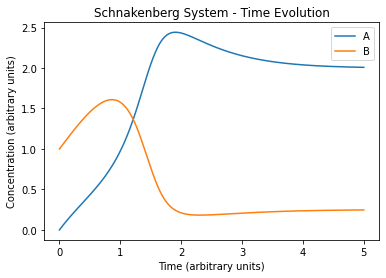

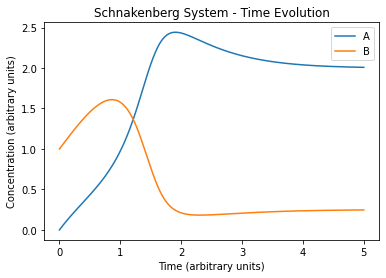

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ode_simulator import solve_schnakenberg

N_STEPS = int(1e3)
STEP_SIZE = 0.005
INITIAL_COND = [0,1]  # Starting value of [A, B]
A_PROD, B_PROD = 1, 1  # Initial production rates

t_steps = np.linspace(0, N_STEPS * STEP_SIZE, N_STEPS)

t_values, state_values = solve_schnakenberg(t_max = N_STEPS * STEP_SIZE,
                                            t_eval = t_steps,
                                            y_init = INITIAL_COND,
                                            rates = [A_PROD, B_PROD])

plt.plot(t_values, state_values[0], label = 'A')
plt.plot(t_values, state_values[1], label = 'B')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')
plt.title('Schnakenberg System - Time Evolution')
plt.legend()
plt.show()

In [3]:
import inspect
print(inspect.getfullargspec(solve_schnakenberg))


FullArgSpec(args=['t_max', 't_min', 'y_init', 'rates', 't_eval'], varargs=None, varkw=None, defaults=(0, [0, 0], [0, 0], None), kwonlyargs=[], kwonlydefaults=None, annotations={})


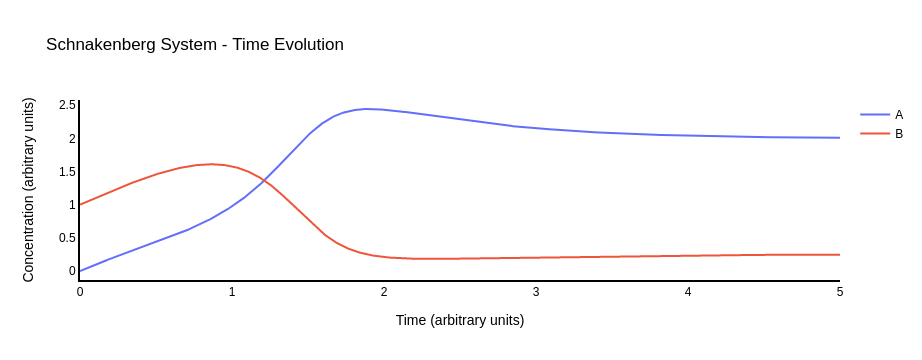

In [5]:
import plotly.graph_objects as go
from plotly.graph_objects import Layout

# Set layout with background color you want (rgba values)
layout = Layout(plot_bgcolor='rgba(0,0,0,0)')

# Use that layout here
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(
    x=t_values, y=state_values[0], name='A'
))
fig.add_trace(go.Scatter(
    x=t_values, y=state_values[1], name='B'
))

fig.update_layout(title='Schnakenberg System - Time Evolution',
                  yaxis_title = 'Concentration (arbitrary units)',
                  xaxis_title ='Time (arbitrary units)',
                  font=dict(family="Arial", size=12, color="Black"))
 

# Change grid color and axis colors
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, gridcolor='Black
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, gridcolor='Black
fig.show()



In [6]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…